In [1]:
# Import packages needed for Part 2
import os
import sqlite3
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Set working directory containing the Harvard Dataverse files
os.chdir("C:/Users/lowbe/Downloads/ST2195 X")
os.getcwd()

'C:\\Users\\lowbe\\Downloads\\ST2195 X'

In [3]:
# Remove the database if it already exists then connect to the new database named "airline_v2.db"
try: 
    os.remove("airline_v2.db")
except OSError:
    pass
conn = sqlite3.connect("airline_v2.db")

In [4]:
# Creating tables in database
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planes = pd.read_csv("plane-data.csv")

airports.to_sql("airports", conn, index=False, if_exists='replace')
carriers.to_sql("carriers", conn, index = False, if_exists='replace')
planes.to_sql("planes", conn, index = False, if_exists='replace')

5029

In [11]:
# Read and write CSV files containing 10 years of data into one database table
dfs = []
for year in range(1998, 2008):
    filename = f"{year}.csv.bz2"
    # Read CSV files in chunks
    chunks = pd.read_csv(filename, encoding="latin-1", compression="bz2", chunksize=10000)
    for chunk in chunks:
        dfs.append(chunk)
    print(f"{filename} completed")
ontime = pd.concat(dfs, ignore_index=True)

1998.csv.bz2 completed
1999.csv.bz2 completed
2000.csv.bz2 completed
2001.csv.bz2 completed
2002.csv.bz2 completed
2003.csv.bz2 completed
2004.csv.bz2 completed
2005.csv.bz2 completed
2006.csv.bz2 completed
2007.csv.bz2 completed


Part 2a: What are the best times and days of the week to minimise delays each year?

In [12]:
# Delays Table
Delays = ontime

# Day Segmentation Function
def find_time(CRSDepTime):
    if CRSDepTime in range(500, 1200):
        return "Morning"
    elif CRSDepTime in range(1200, 1700):
        return "Afternoon"
    elif CRSDepTime in range(1700, 2100):
        return "Evening"
    else:
        return "Night"

# Apply the find_time function to create the 'TimeofDay' variable
TimeofDay_list =[]
for CRSDepTime in Delays['CRSDepTime']:
    TimeofDay = find_time(CRSDepTime)
    TimeofDay_list.append(TimeofDay)
Delays['TimeofDay'] = TimeofDay_list

# Day of Week Function
def find_day(DayOfWeek):
    Day = {
        1:'Monday', 2:'Tuesday', 3:'Wednesday',
        4:'Thursday', 5:'Friday', 6:'Saturday',
        7:'Sunday'}
    return Day.get(DayOfWeek)

# Apply the find_day function to create the 'Day' variable
Day_list = []
for DayOfWeek in Delays['DayOfWeek']:
    Day = find_day(DayOfWeek)
    Day_list.append(Day)
Delays['Day'] = Day_list

# Function to filter out the negative ArrDelay values
def delayed(ArrDelay):
    if ArrDelay > 0:
        return ArrDelay

Delayed_list = []

for ArrDelay in Delays['ArrDelay']:
    Delay = delayed(ArrDelay)
    Delayed_list.append(Delay)
    
Delays['arrdelay'] = Delayed_list

In [13]:
# Grouping the data by Year, Day and Time of Day
Delays = Delays.groupby(['Year', 'Day', 'TimeofDay'], as_index = False).agg({'arrdelay': ['mean']})

# Calculating the average delay
Delays['AvgDelay'] = Delays[('arrdelay', 'mean')]

Delays = Delays[['Year', 'Day', 'TimeofDay', 'AvgDelay']]

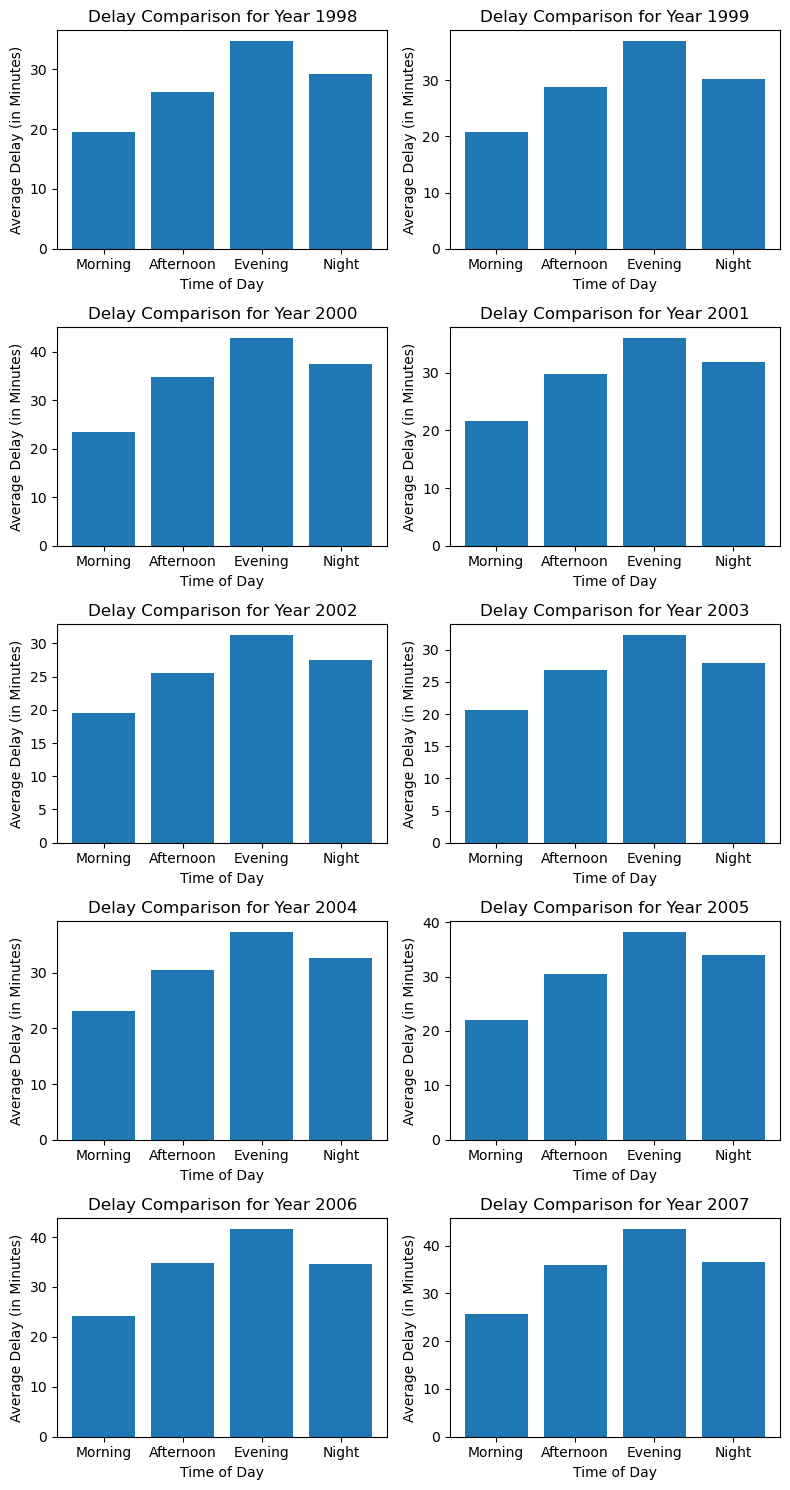

In [15]:
# Map categorical values in 'TimeofDay' to numeric values
time_of_day_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
Delays['TimeofDayNumeric'] = Delays['TimeofDay'].map(time_of_day_mapping)

# Get unique years
unique_years = Delays['Year'].unique()

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(8, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over unique years
for i, year in enumerate(unique_years):
    
    # Filter data for the current year
    year_data = Delays[Delays['Year'] == year]

    # Set the width of the bars
    bar_width = 0.35

    # Plot average delay against Time of Day
    axes[i].bar(year_data['TimeofDayNumeric'], year_data['AvgDelay'])
    
    axes[i].set_xticks(list(time_of_day_mapping.values()))
    axes[i].set_xticklabels(list(time_of_day_mapping.keys()))

    axes[i].set_title(f'Delay Comparison for Year {year}')
    
    axes[i].set_xlabel('Time of Day')
    axes[i].set_ylabel('Average Delay (in Minutes)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

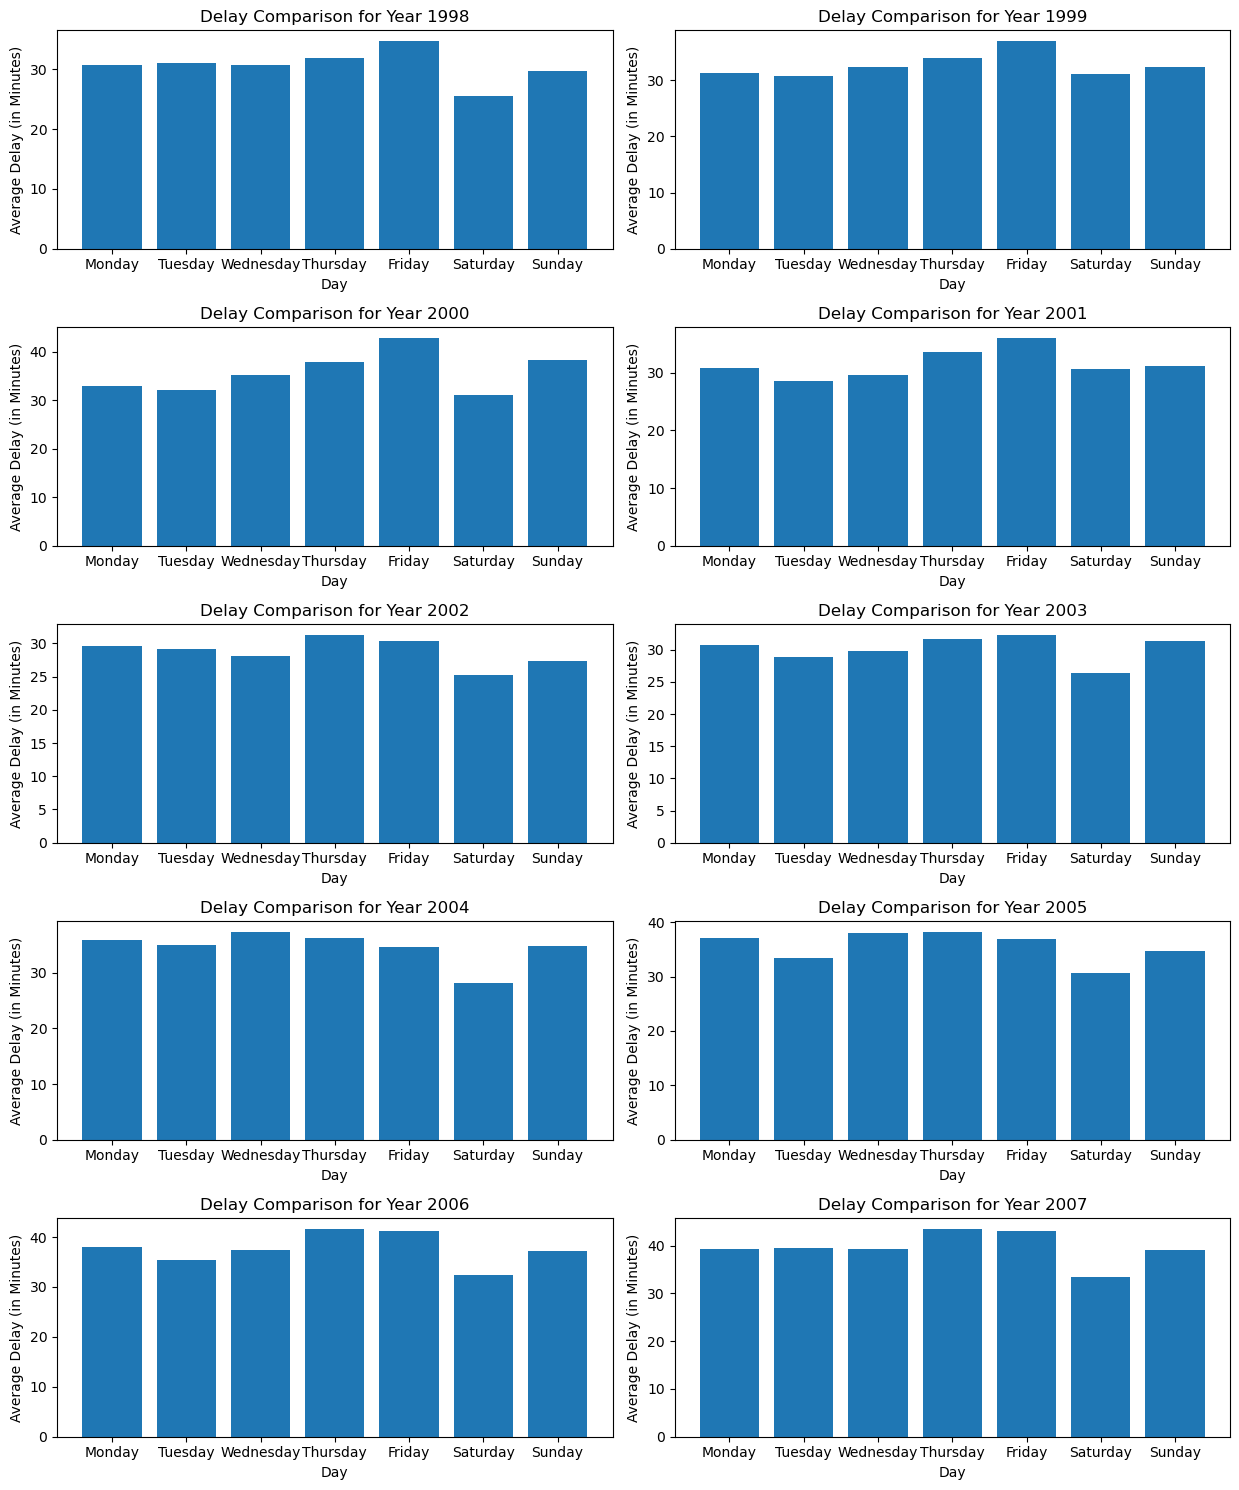

In [16]:
# Map categorical values in 'Day' to numeric values
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
Delays['DayNumeric'] = Delays['Day'].map(day_mapping)

# Create subplots
fig, axes = plt.subplots(5, 2, figsize=(12.5, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over unique years
for i, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = Delays[Delays['Year'] == year]
    
    # Set the width of the bars
    bar_width = 0.35

    # Plot average delay against Day
    axes[i].bar(year_data['DayNumeric'], year_data['AvgDelay'])
    
    axes[i].set_xticks(list(day_mapping.values()))
    axes[i].set_xticklabels(list(day_mapping.keys()))

    axes[i].set_title(f'Delay Comparison for Year {year}')
    
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Average Delay (in Minutes)')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [17]:
conn.close()

Part 2b: Evaluate whether older planes suffer more delays on a year-to-year basis.

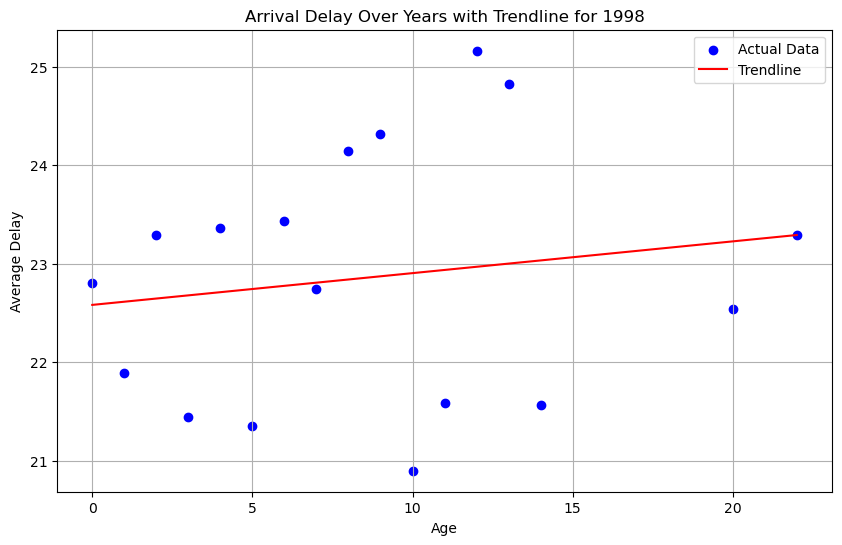

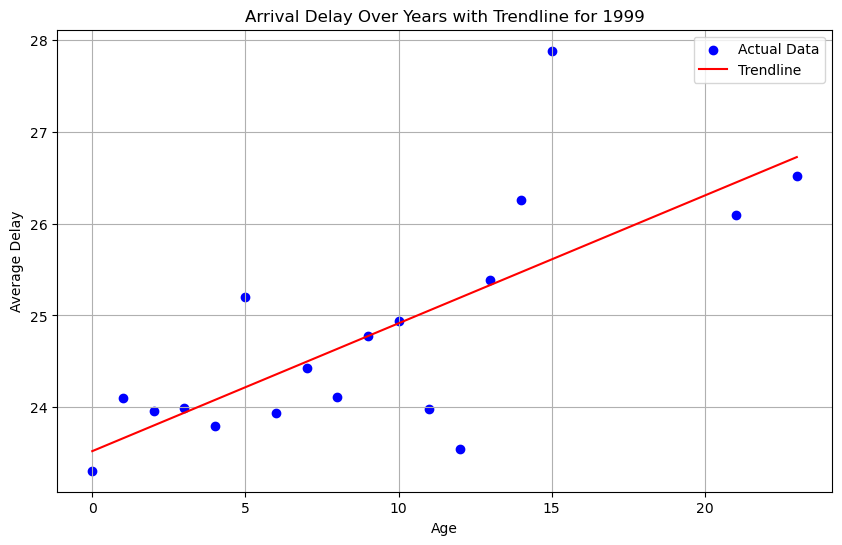

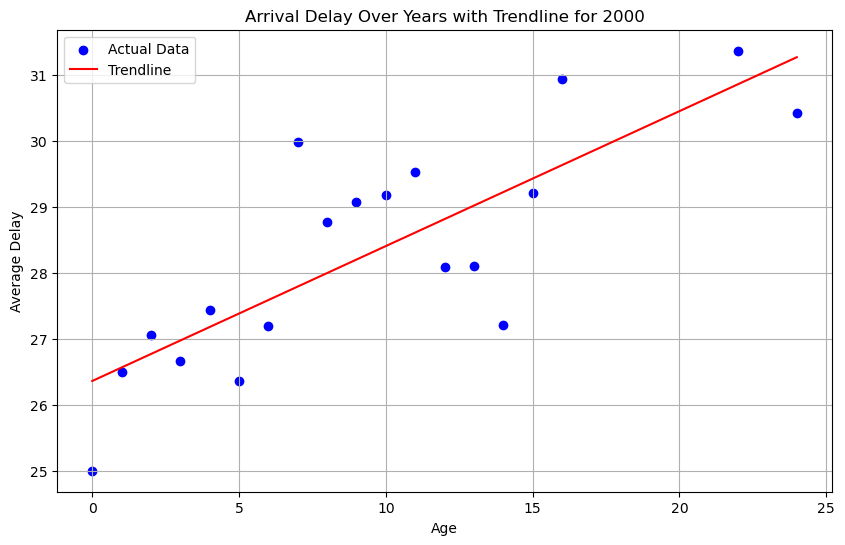

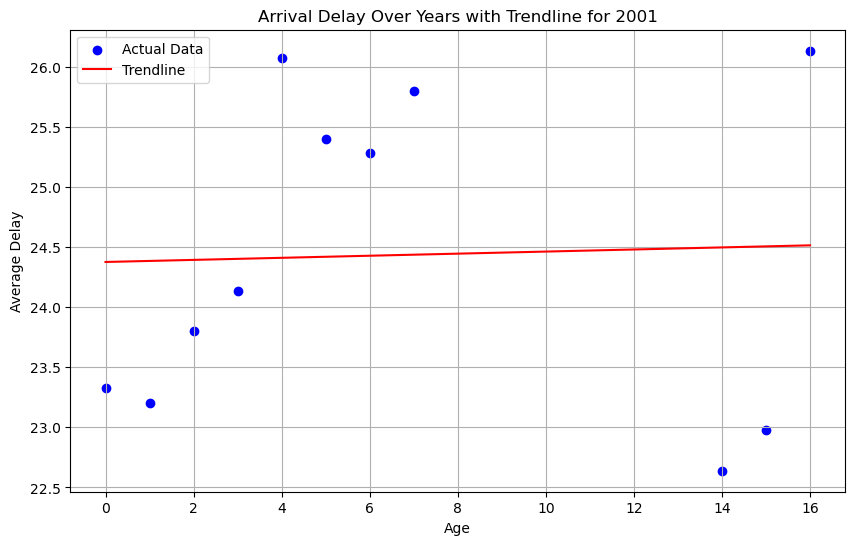

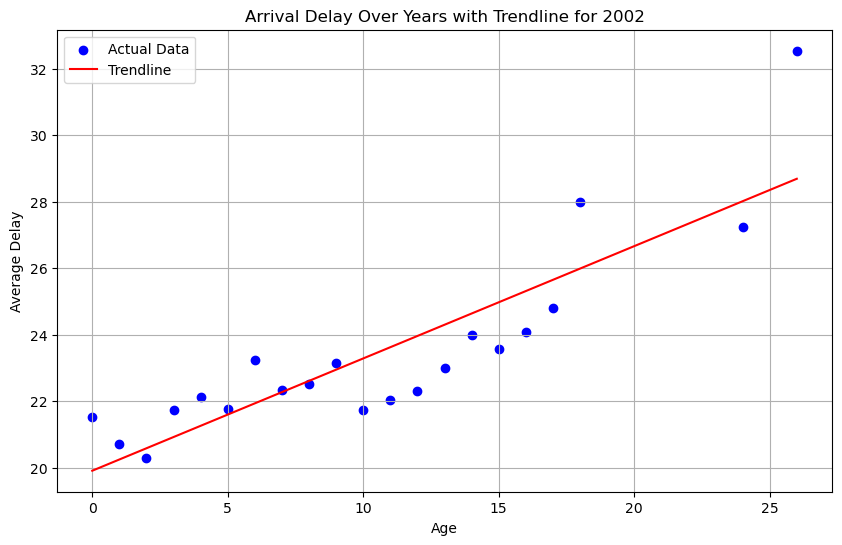

C:\Users\lowbe\AppData\Local\Temp\ipykernel_23172\1681493997.py:10: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  ontime = pd.read_csv(filename, compression='bz2', encoding='latin-1')


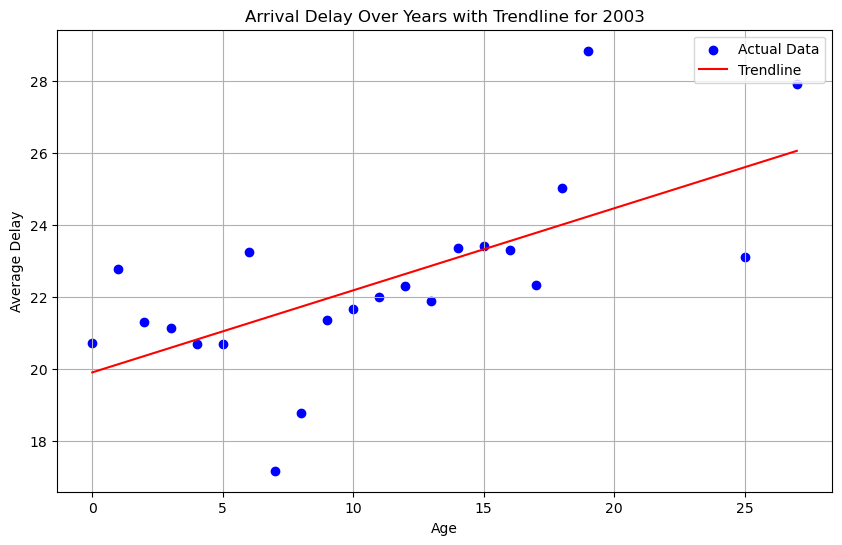

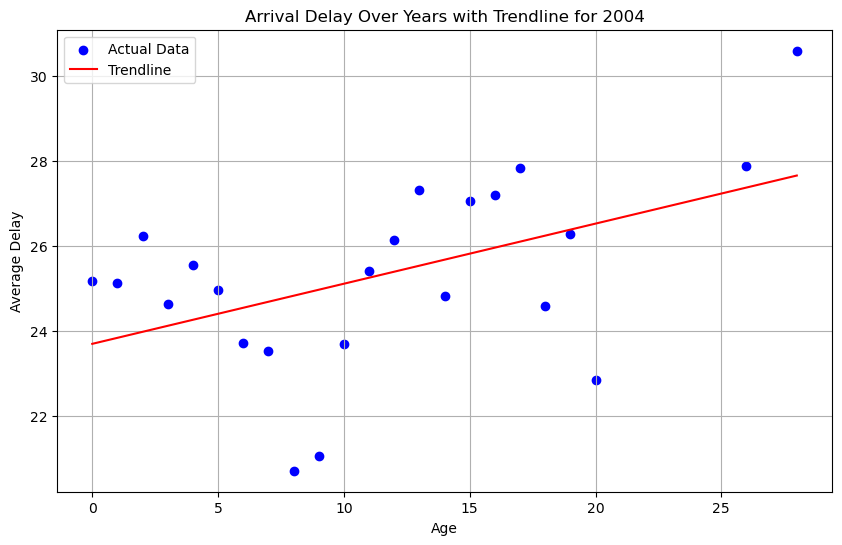

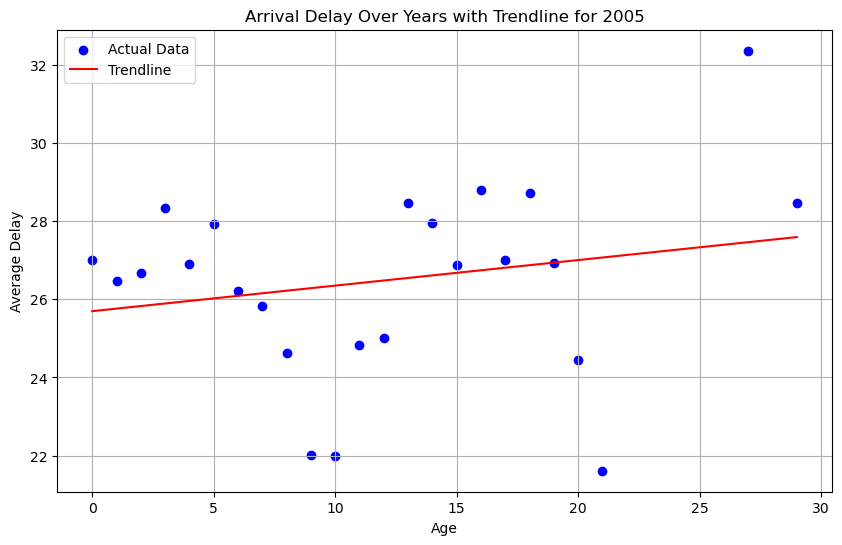

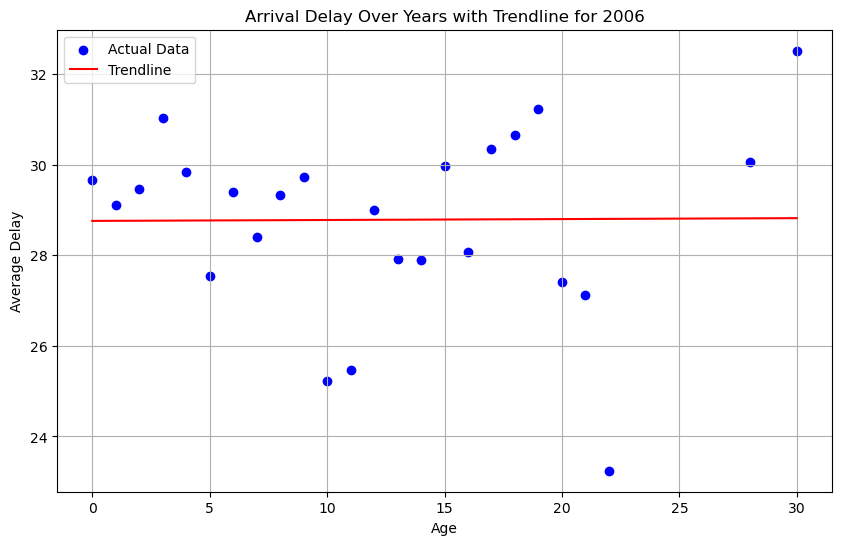

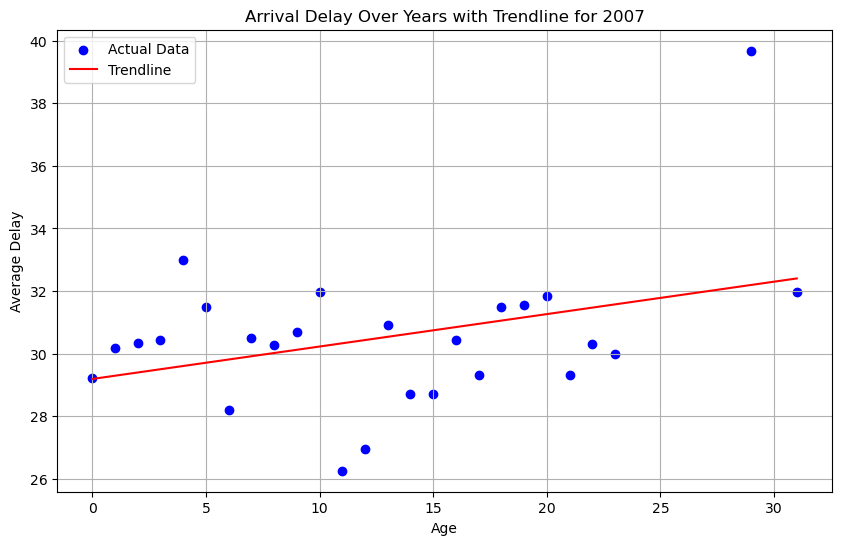

In [6]:
# Create a list containing every year
years = list(range(1998,2008))

# # Initialize an empty list to store plots for part 2b
correlation_results = []

# Iterate over each year
for year in years:
    filename = f"{year}.csv.bz2"
    ontime = pd.read_csv(filename, compression='bz2', encoding='latin-1')
    
    # Filter relevant columns and rename them
    ontime = ontime[['TailNum', 'ArrDelay', 'Year']]
    ontime.columns = ['tailnum', 'ArrDelay', 'flight_year']
    
    # Merge DataFrames on 'tailnum'
    merged = pd.merge(ontime, planes, on='tailnum', how='right')
    
    # Drop rows with NA values
    merged = merged.dropna()
    
    # Filter relevant columns and rename them
    merged = merged[['issue_date', 'tailnum', 'ArrDelay', 'flight_year']]
    merged['issue_date'] = pd.to_datetime(merged['issue_date'], format='%m/%d/%Y', errors='coerce')
    merged['issue_year'] = merged['issue_date'].dt.year
    
    # Calculate plane age
    merged['plane_age'] = merged['flight_year'] - merged['issue_year']

    # Filter out negative plane ages
    merged = merged[merged['plane_age'] >= 0]
    # Filter out the negative ArrDelay values
    merged = merged[merged['ArrDelay'] >= 0]
    
    # Group by 'issue_year' and calculate average delay
    grouped = merged.groupby('plane_age')['ArrDelay'].mean().reset_index()
    grouped.columns = ['plane_age', 'average_delay']
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(grouped['plane_age'], grouped['average_delay'], marker='o', color='b', label='Actual Data')

    # Perform linear regression
    X = grouped[['plane_age']]
    y = grouped['average_delay']
    model = LinearRegression().fit(X, y)
    trendline = model.predict(X)

    # Plot the trendline
    plt.plot(grouped['plane_age'], trendline, color='r', label='Trendline')
    plt.title(f'Arrival Delay Over Years with Trendline for {year}')
    plt.xlabel('Age')
    plt.ylabel('Average Delay')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Correlation Test
    cor = scipy.stats.pearsonr(grouped['plane_age'], grouped['average_delay'])
    correlation_results.append((year, cor))

In [7]:
# Print the correlation results
for year, cor in correlation_results:
    if 0.87 < cor[0] <= 1:
         print(f"A correlation coefficient of {cor[0]} indicates a strong positive correlation between age of the aircraft and average arrival delays. Hence, this shows that there are significantly more delays as the plane gets older in year {year}.")
    elif 0.5 < cor[0] <= 0.87:
        print(f"A correlation coefficient of {cor[0]} indicates a moderate positive correlation between age of the aircraft and average arrival delays. Hence, this shows that there are more delays as the plane gets older in year {year}.")
    elif 0 < cor[0] <= 0.5:
        print(f"A correlation coefficient of {cor[0]} indicates a weak positive correlation between age of the aircraft and average arrival delays. Hence, this shows that delays remain relatively consistent even as the plane gets older in year {year}.")
    elif -0.5 < cor[0] <= 0:
        print(f"A correlation coefficient of {cor[0]} indicates a weak negative correlation between age of the aircraft and average arrival delays. Hence, this shows that delays remain relatively consistent even as the plane gets older in year {year}.")
    elif -0.87 < cor[0] <= -0.5:
        print(f"A correlation coefficient of {cor[0]} indicates a moderate negative correlation between age of the aircraft and average arrival delays. Hence, this shows that there are less delays as the plane gets older in year {year}.")
    elif -1 < cor[0] <= -0.87:
        print(f"A correlation coefficient of {cor[0]} indicates a strong negative correlation between age of the aircraft and average arrival delays. Hence, this shows that there are significantly less delays as the plane gets older in year {year}.")

A correlation coefficient of 0.15739722723729885 indicates a weak positive correlation between age of the aircraft and average arrival delays. Hence, this shows that delays remain relatively consistent even as the plane gets older in year 1998.
A correlation coefficient of 0.7385662846669881 indicates a moderate positive correlation between age of the aircraft and average arrival delays. Hence, this shows that there are more delays as the plane gets older in year 1999.
A correlation coefficient of 0.8005487947378775 indicates a moderate positive correlation between age of the aircraft and average arrival delays. Hence, this shows that there are more delays as the plane gets older in year 2000.
A correlation coefficient of 0.03757826274726267 indicates a weak positive correlation between age of the aircraft and average arrival delays. Hence, this shows that delays remain relatively consistent even as the plane gets older in year 2001.
A correlation coefficient of 0.8653280014154896 indi

Part 2c: Logistic Regression Model for the probability of diverted US flights

In [8]:
# Initialize an empty list to store results and plots for part 2c
results = []
plots = []

# Iterate over each year
for year in years:
    filename = f"{year}.csv.bz2"
    ontime = pd.read_csv(filename, compression = 'bz2', encoding = 'latin-1')

    # Extracting the hour from the scheduled departure and arrival times
    ontime['DepHour'] = ontime['CRSDepTime'].astype(str).str.zfill(4).apply(lambda x: str(x)[:2] if pd.notnull(x) else x)
    ontime['ArrHour'] = ontime['CRSArrTime'].astype(str).str.zfill(4).apply(lambda x: str(x)[:2] if pd.notnull(x) else x)

    # Merging the 'ontime' DataFrame with the 'airports' DataFrame based on the 'Origin' and 'Dest' columns to add latitude and longitude information for origin and destination airports
    ontime = pd.merge(ontime, airports, left_on='Origin', right_on='iata', how = 'left', suffixes=('', '_origin'))
    ontime = pd.merge(ontime, airports, left_on='Dest', right_on='iata', how = 'left', suffixes=('_origin', '_dest'))

    # Use LabelEncoder to convert categories to numeric values
    label_encoder = LabelEncoder()
    ontime['Origin'] = label_encoder.fit_transform(ontime['Origin'])
    ontime['Dest'] = label_encoder.fit_transform(ontime['Dest'])
    ontime['UniqueCarrier'] = label_encoder.fit_transform(ontime['UniqueCarrier'])

    # Extract variables needed to run the logistic regression model
    features = ontime[['Month', 'DayofMonth', 'DayOfWeek', 'DepHour', 'ArrHour', 'Origin', 'lat_origin', 'long_origin', 'Dest', 'lat_dest', 'long_dest', 'Distance', 'UniqueCarrier']].copy()
    target = ontime['Diverted']

    # Replace NA values with 0
    features.fillna(0, limit=1, inplace=True)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

    # Initialize logistic regression model
    model = LogisticRegression(class_weight = "balanced", max_iter = 10000)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Extract coefficients
    coefficient = pd.DataFrame(model.coef_)
    variable = pd.DataFrame(X_train.columns.tolist())
    coeff_plot = pd.concat([variable,coefficient.T], axis=1)
    coeff_plot.columns = ['Variable', 'Coefficient']
    
    # Append results and plots to lists
    results.append((year, accuracy, conf_matrix))
    plots.append((year, coeff_plot))

C:\Users\lowbe\AppData\Local\Temp\ipykernel_23172\2371768580.py:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  ontime = pd.read_csv(filename, compression = 'bz2', encoding = 'latin-1')


In [9]:
# Print classification accuracy and confusion matrix
for year, accuracy, conf_matrix in results:
    print(f"Year {year}:\nAccuracy: {accuracy}\nConfusion Matrix:\n{conf_matrix}")

Year 1998:
Accuracy: 0.6746936937355204
Confusion Matrix:
[[725144 349120]
 [  1217   1464]]
Year 1999:
Accuracy: 0.6047213355560038
Confusion Matrix:
[[666986 435974]
 [  1037   1580]]
Year 2000:
Accuracy: 0.5842531739118959
Confusion Matrix:
[[662323 471472]
 [  1070   1745]]
Year 2001:
Accuracy: 0.5935238899557289
Confusion Matrix:
[[706869 484087]
 [  1065   1535]]
Year 2002:
Accuracy: 0.6180729451223214
Confusion Matrix:
[[650683 401978]
 [   677    934]]
Year 2003:
Accuracy: 0.5950583644394579
Confusion Matrix:
[[770932 524534]
 [   962   1280]]
Year 2004:
Accuracy: 0.6405417384949651
Confusion Matrix:
[[911885 511181]
 [  1354   1434]]
Year 2005:
Accuracy: 0.6072893034198806
Confusion Matrix:
[[865701 559638]
 [  1200   1581]]
Year 2006:
Accuracy: 0.6123671139083651
Confusion Matrix:
[[872775 552389]
 [  1300   1921]]
Year 2007:
Accuracy: 0.6171457552210691
Confusion Matrix:
[[917984 569260]
 [  1439   1960]]


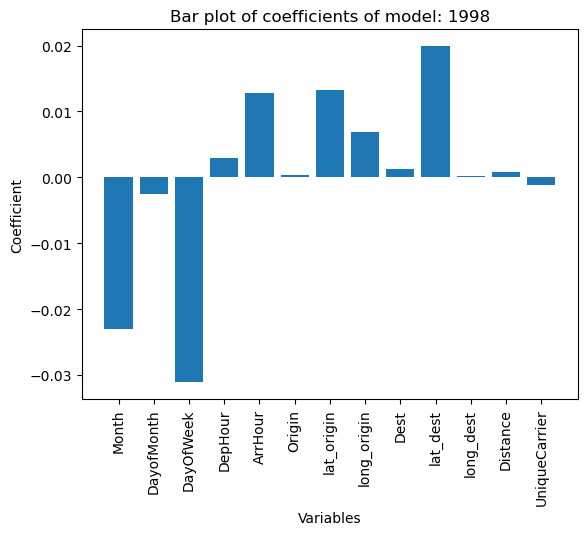

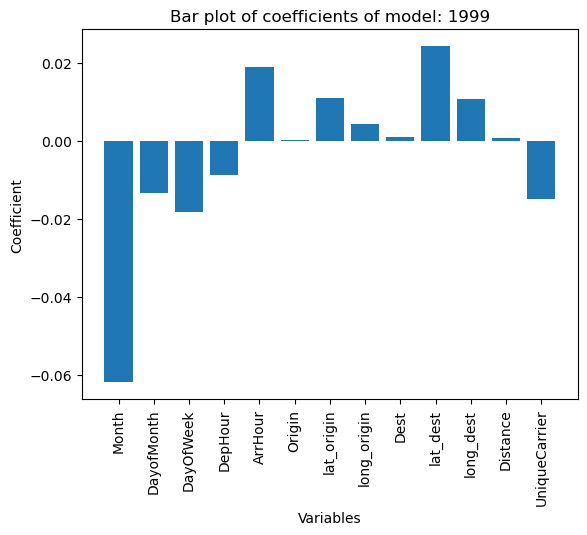

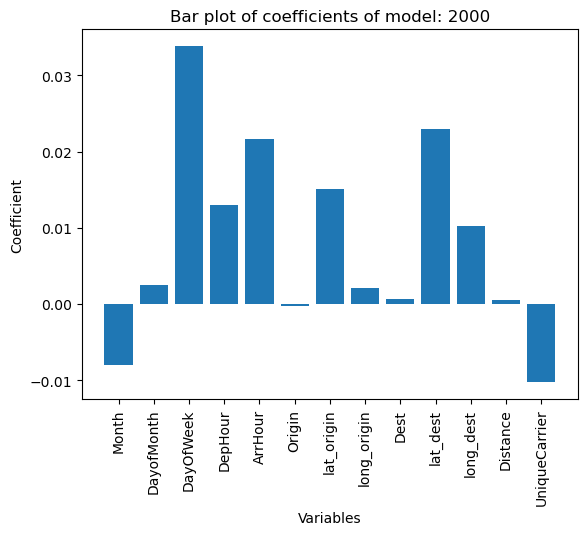

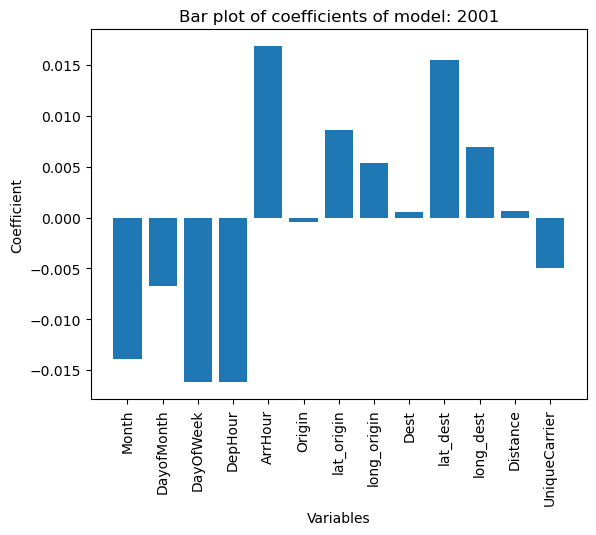

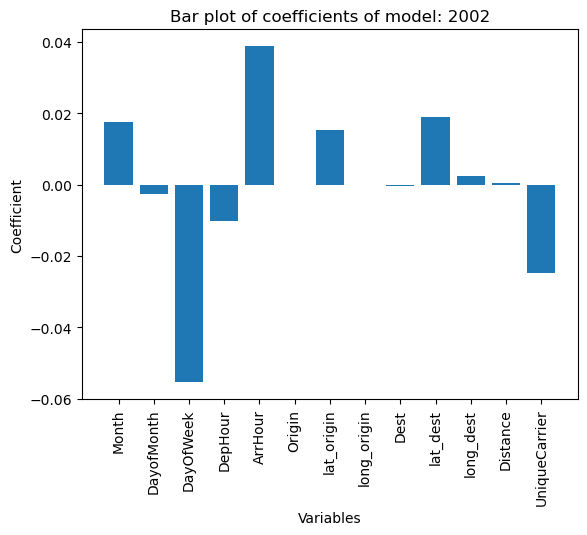

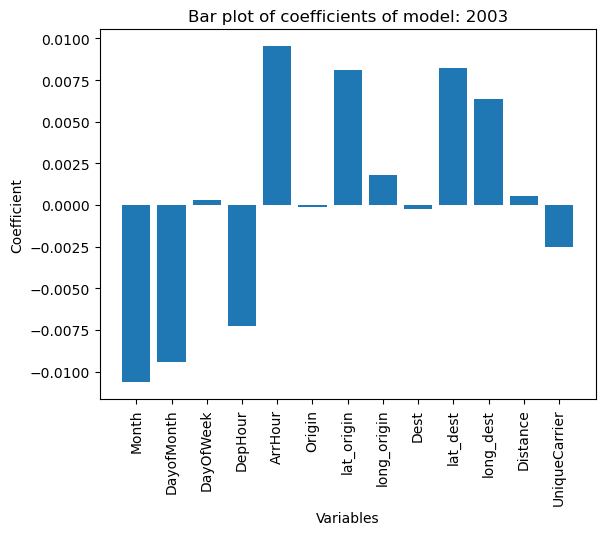

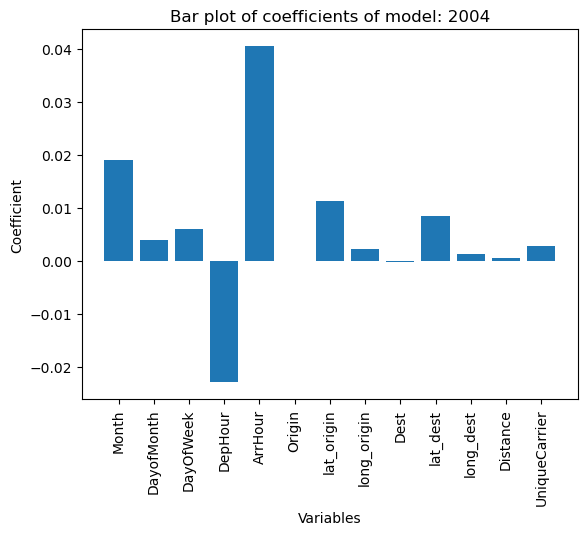

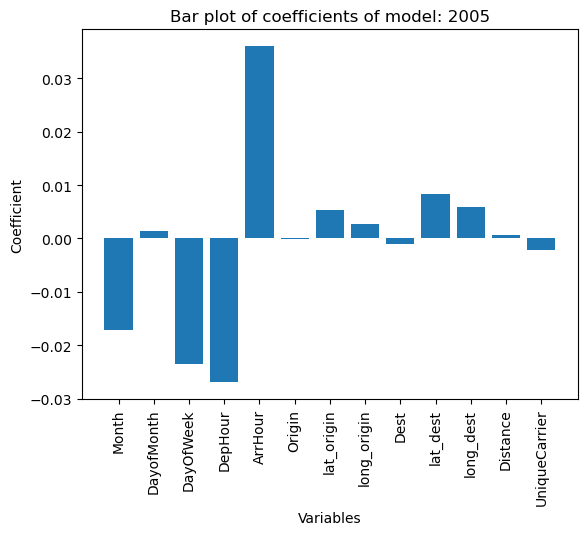

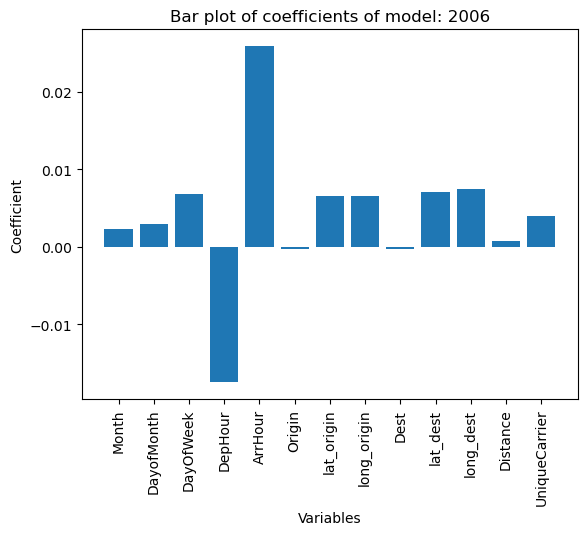

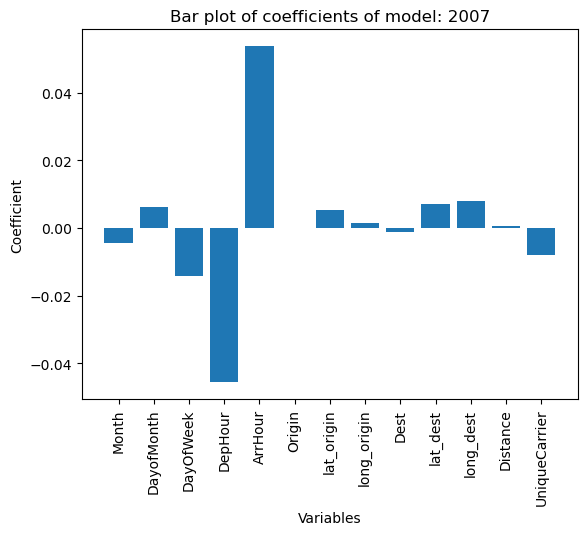

In [10]:
# Print the coefficient plots
for year, coeff_plot in plots:
    plot = plt.bar(coeff_plot['Variable'], coeff_plot['Coefficient'])
    plt.xticks(rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Coefficient')
    plt.title(f'Bar plot of coefficients of model: {year}')
    plt.show()